# Polynomial Regression applied on Boston Housing Dataset

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
#Import the 'Boston.csv' data file
data = pd.read_csv('Boston.csv')

In [4]:
#Make a copy of data in 'df'
df = data.copy() 

In [5]:
#Display top 5 rows of data
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating Independent and Dependent Variables

In [6]:
#Create Independent and Dependent variables in 'X' and 'Y' and print their respective shapes.
X = df.drop('median home price', axis = 1)
Y = df[['median home price']]


In [7]:
print(X.shape)
print(Y.shape)

(506, 13)
(506, 1)


### Normalizing Data

**In order to Normalize the data we shall apply MinMax Scaling on X.**

In [8]:
X.columns

Index(['Crime Rate', 'Residential Proportion',
       'non-retail business acres/Town', 'Charles River', 'NO2 concentration',
       'Average Rooms/Dwelling.', 'Prior Built Units Proportion',
       'Distance to Employment Centres', 'Radial Highways Distance',
       'ValueProperty/tax rate', 'Teacher/town', 'blacks/town',
       'Lower Status Percent'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)

X = pd.DataFrame(data= X_, columns=X.columns)
X.head()


,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Splitting Data

In [10]:
#Split the data into training and testing set and print their shapes.
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y ,test_size= 0.3, random_state= 25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)


(354, 13) (354, 1)
(152, 13) (152, 1)


### Applying Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
#Applying the fit() function on the model
model.fit(xtrain, ytrain)

LinearRegression()

In [14]:
#Get the predicted values on training data set
train_pred = model.predict(xtrain)

In [15]:
#Get the predicted values on test data set
test_pred= model.predict(xtest)

### Finding R2 Score

In [17]:
#R2 score for training data
r2_train_lr = r2_score(ytrain, train_pred)
r2_train_lr

0.7435787589010061

In [18]:
#R2 score for testing data
from sklearn.metrics import r2_score
r2_test_lr = r2_score(ytest, test_pred)
r2_test_lr

0.7133593313710357

**Creating Residual Plot**

In [19]:
#!pip install yellowbrick

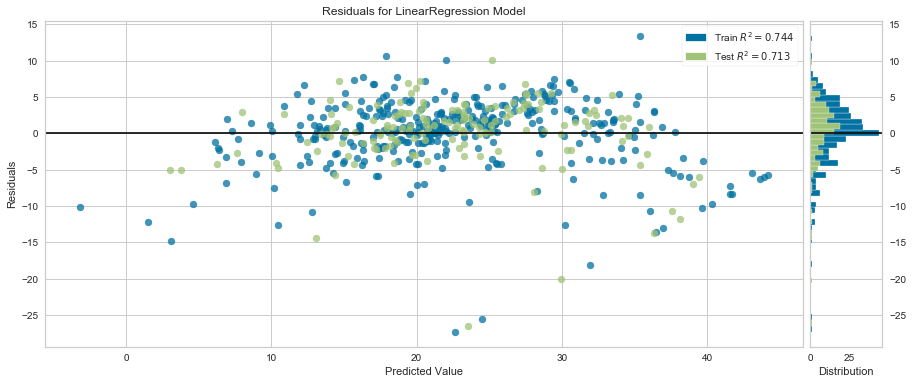

In [20]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(model)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()    

# Applying Polynomial Regression 

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly_features = PolynomialFeatures(degree=2)

In [23]:
#Transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(xtrain)

In [24]:
poly_features.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [25]:
len(poly_features.get_feature_names())

105

In [26]:
#Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, ytrain)

LinearRegression()

In [27]:
#Predicting on training dataset
y_train_predicted = poly_model.predict(X_train_poly)

In [28]:
#Predicting on testing dataset
X_test_poly=poly_features.fit_transform(xtest)
y_test_predict = poly_model.predict(X_test_poly)

In [29]:
#Evaluating the model on training dataset
r2_train = r2_score(ytrain, y_train_predicted)

In [30]:
#Evaluating the model on test dataset
r2_test = r2_score(ytest, y_test_predict)

In [31]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.9322525327409263
The r2 score for testing set is:  0.8194893868475598


# Model Complexity vs Performance

In [32]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score
mse_train=[]
mse_test=[]
mse_cv=[]
r2_train=[]
r2_test=[]
r2_cv=[]
for i in range(1,8):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    
    mse_cv_scores=cross_val_score(poly,X_tr_poly,ytrain,cv=5,scoring=make_scorer(mean_squared_error))
    r2_cv_scores=cross_val_score(poly,X_tr_poly,ytrain,cv=5)
    
    r2_train.append(r2_score(ytrain, y_tr_predicted))
    r2_test.append(r2_score(ytest, y_tst_predict))
    r2_cv.append(r2_cv_scores.mean())
    
    mse_train.append(mean_squared_error(ytrain, y_tr_predicted))
    mse_test.append(mean_squared_error(ytest, y_tst_predict))
    mse_cv.append(mse_cv_scores.mean())
    

In [33]:
mse_train

[22.643507749191375,
 5.982500877439761,
 3.66054185277924e-23,
 3.1042796892069054e-24,
 3.0907420160145187e-24,
 4.032567168879221e-24,
 4.332781494489116e-23]

In [34]:
mse_test

[21.597209035018444,
 13.60074082976328,
 3105.7561418888263,
 1150.323630725703,
 957.8467375205986,
 797.4525860256263,
 654.6876509261828]

In [35]:
r2_train

[0.7435787589010061, 0.9322525327409263, 1.0, 1.0, 1.0, 1.0, 1.0]

In [36]:
r2_test

[0.7133593313710358,
 0.8194893868475598,
 -40.219956507624055,
 -14.267228932973637,
 -11.712653234119236,
 -9.583883412326612,
 -7.689090599638524]

**Based on the results we can say that *degree 2* is the best for our model**

### Comparison of R2 Score

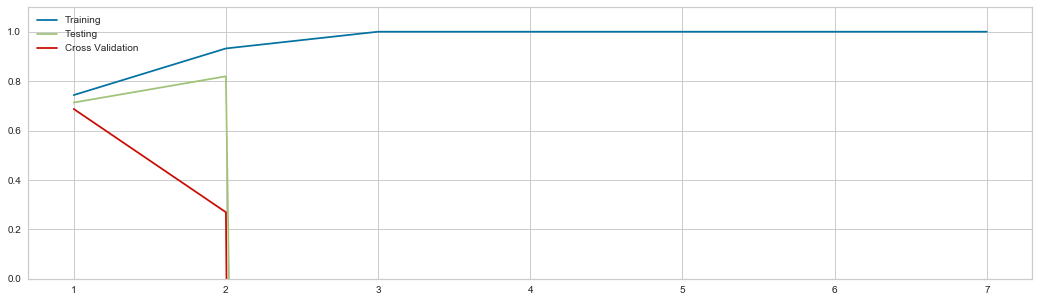

In [37]:
plt.figure(figsize=(18,5))
sns.lineplot(x=list(range(1,8)), y=r2_train, label='Training')
sns.lineplot(x=list(range(1,8)), y=r2_test, label='Testing')
sns.lineplot(x=list(range(1,8)), y=r2_cv, label='Cross Validation')
plt.ylim(0,1.1)
plt.show()

### Comparison of Mean Squared Error

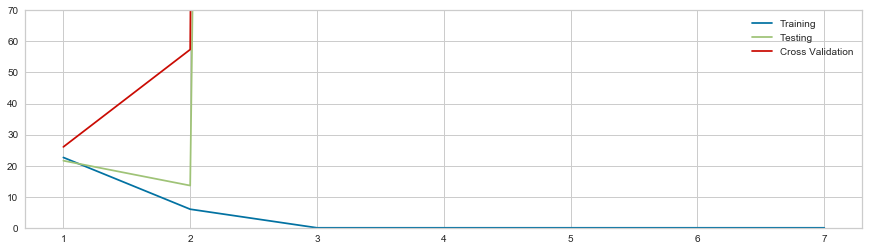

In [38]:
plt.figure(figsize=(15,4))
sns.lineplot(x=list(range(1,8)), y=mse_train, label='Training')
sns.lineplot(x=list(range(1,8)), y=mse_test, label='Testing')
sns.lineplot(x=list(range(1,8)), y=mse_cv, label='Cross Validation')
plt.ylim(0,70)
plt.show();